# Poisson Regression 

Optimization terminated successfully.
         Current function value: 3.044115
         Iterations 4


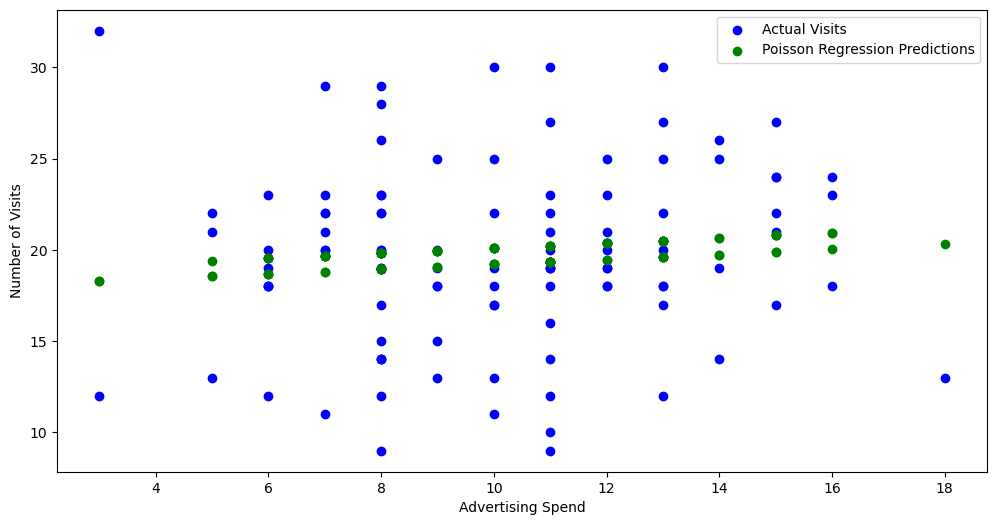

In [16]:
# Poisson Regression 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Sample data
np.random.seed(42)
data = pd.DataFrame({
    'advertising': np.random.poisson(lam=10, size=100),
    'store_size': np.random.randint(1, 3, size=100),
    'visits': np.random.poisson(lam=20, size=100)
})

# Linear regression model
#linear_model = smf.ols('visits ~ advertising + store_size + freeway_distance', data=data).fit()
#data['linear_pred'] = linear_model.predict(data)

# Poisson regression model
poisson_model = smf.poisson('visits ~ advertising + store_size', data=data).fit()
data['poisson_pred'] = poisson_model.predict(data)

# Plotting the predictions
plt.figure(figsize=(12, 6))
plt.scatter(data['advertising'], data['visits'], color='blue', label='Actual Visits')
#plt.scatter(data['advertising'], data['linear_pred'], color='red', label='Linear Regression Predictions')
plt.scatter(data['advertising'], data['poisson_pred'], color='green', label='Poisson Regression Predictions')
plt.xlabel('Advertising Spend')
plt.ylabel('Number of Visits')
plt.legend()
plt.show()


In [24]:
# Summary of the model
print(poisson_model.summary())
print(negb_model.summary())

print(data["visits"].mean())
print(data["visits"].var())

                          Poisson Regression Results                          
Dep. Variable:                 visits   No. Observations:                  100
Model:                        Poisson   Df Residuals:                       97
Method:                           MLE   Df Model:                            2
Date:                Tue, 14 May 2024   Pseudo R-squ.:                 0.09915
Time:                        18:25:48   Log-Likelihood:                -288.61
converged:                       True   LL-Null:                       -320.37
Covariance Type:            nonrobust   LLR p-value:                 1.603e-14
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.1204      0.116     18.209      0.000       1.892       2.349
advertising     0.0631      0.008      7.973      0.000       0.048       0.079
store_size      0.0192      0.050      0.388    

      id  num_awards  prog  math
0     45           0     3    41
1    108           0     1    41
2     15           0     3    44
3     67           0     3    42
4    153           0     3    40
..   ...         ...   ...   ...
195  100           2     2    71
196  143           2     3    75
197   68           1     2    71
198   57           0     2    72
199  132           3     2    73

[200 rows x 4 columns]


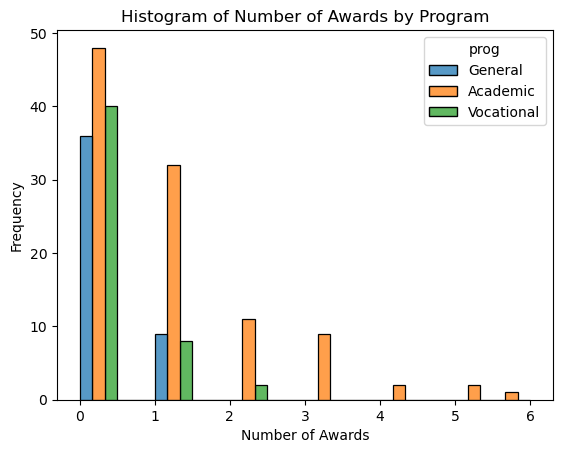

Optimization terminated successfully.
         Current function value: 0.913761
         Iterations 6
<table class="simpletable">
<caption>Poisson Regression Results</caption>
<tr>
  <th>Dep. Variable:</th>      <td>num_awards</td>    <th>  No. Observations:  </th>  <td>   200</td>  
</tr>
<tr>
  <th>Model:</th>                <td>Poisson</td>     <th>  Df Residuals:      </th>  <td>   196</td>  
</tr>
<tr>
  <th>Method:</th>                 <td>MLE</td>       <th>  Df Model:          </th>  <td>     3</td>  
</tr>
<tr>
  <th>Date:</th>            <td>Thu, 16 May 2024</td> <th>  Pseudo R-squ.:     </th>  <td>0.2118</td>  
</tr>
<tr>
  <th>Time:</th>                <td>11:03:38</td>     <th>  Log-Likelihood:    </th> <td> -182.75</td> 
</tr>
<tr>
  <th>converged:</th>             <td>True</td>       <th>  LL-Null:           </th> <td> -231.86</td> 
</tr>
<tr>
  <th>Covariance Type:</th>     <td>nonrobust</td>    <th>  LLR p-value:       </th> <td>3.747e-21</td>
</tr>
</table>
<table cla

In [80]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf


awards = pd.read_csv("poisson_sim.csv")
#awards = sm.add_constant(awards)
print(awards)

# Convert 'prog' to categorical with specified levels and labels
awards['prog'] = pd.Categorical(awards['prog'], categories=[1, 2, 3], ordered=True)
awards['prog'] = awards['prog'].map({1: "General", 2: "Academic", 3: "Vocational"})

# Plot the histogram
hist_plot = sns.histplot(data=awards, x='num_awards', hue='prog', multiple='dodge', binwidth=0.5)

# Customize the legend title and axis labels
plt.xlabel('Number of Awards')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Awards by Program')

# Save the plot as a PNG file
plt.savefig('histogram_of_num_awards.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


# Linear regression model
#linear_model = smf.ols('num_awards ~ prog + math', data=scores).fit()

# Poisson regression model
poisson_model = smf.poisson('num_awards ~ C(prog) + math', data=awards).fit()

# Summary of the model
print(poisson_model.summary().as_html())

In [14]:
print(awards["num_awards"].mean())
print(awards["num_awards"].var())

0.63
1.108643216080402
